# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednoduše|ní pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [40]:
import numpy as np
import pandas as pd

Načteme soubory.

In [41]:
intakes = pd.read_csv('intakes.csv')
outcomes = pd.read_csv('outcomes.csv')

Podíváme se na intakes.csv

In [42]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


### Význam příznaků intakes.csv:
* Animal ID: Unikátní identifikátor zvířete.
* Name: Jméno zvířete, pokud je dostupné.
* DateTime: Datum a čas, kdy bylo zvíře přijato do útulku.
* MonthYear: Měsíc a rok, kdy bylo zvíře přijato do útulku.
* Found Location: Místo, kde bylo zvíře nalezeno nebo přijato do útulku.
* Intake Type: Typ přijetí (např. "Stray" pro zatoulaná zvířata).
* Intake Condition: Stav zvířete při přijetí.
* Animal Type: Typ zvířete (např. "Dog" pro psa).
* Sex upon Intake: Pohlaví zvířete při přijetí.
* Age upon Intake: Věk zvířete při přijetí.
* Breed: Rasa zvířete.
* Color: Barva zvířete
#### Počet řádků datasetu: 138,585
Všechny příznaky mají datový typ "object". To naznačuje, že některé příznaky mohou obsahovat řetězce nebo textová data, a bude třeba provést konverzi na vhodné datové typy. 


In [43]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Z datového výstupu je zřejmé, že příznak "**Name**" má chybějící hodnoty, protože počet nenulových hodnot je menší než celkový počet řádků. Příznak "**Sex upon Intake**" také má jednu chybějící hodnotu, kterou můžeme přepsat na NaN:

In [44]:
intakes['Name'] = intakes['Name'].replace('', np.nan)
intakes['Sex upon Intake'] = intakes['Sex upon Intake'].replace('', np.nan)

Odstranění duplicitních záznamů

In [45]:
intakes = intakes.drop_duplicates(subset='Animal ID')
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123890 entries, 0 to 138583
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         123890 non-null  object
 1   Name              83028 non-null   object
 2   DateTime          123890 non-null  object
 3   MonthYear         123890 non-null  object
 4   Found Location    123890 non-null  object
 5   Intake Type       123890 non-null  object
 6   Intake Condition  123890 non-null  object
 7   Animal Type       123890 non-null  object
 8   Sex upon Intake   123889 non-null  object
 9   Age upon Intake   123890 non-null  object
 10  Breed             123890 non-null  object
 11  Color             123890 non-null  object
dtypes: object(12)
memory usage: 12.3+ MB


Konverze příznaků na spravný typ

[extract values from string](https://stackoverflow.com/questions/65745345/how-to-convert-a-column-of-strings-to-python-literals-and-extract-the-values)
[transofm time](https://stackoverflow.com/questions/51235708/parsing-string-to-datetime-while-accounting-for-am-pm-in-pandas)

In [46]:
categorical_columns = ['Intake Type', 'Intake Condition', 'Animal Type']
intakes[categorical_columns] = intakes[categorical_columns].astype('category')

def string_to_age(age_str):
    if pd.isna(age_str):
        return np.nan
    age, unit = age_str.split()
    age = int(age)
    if age < 0: # Age cant be negative
        return np.nan
    if 'day' in unit:
        return round(age / 365, 1)
    elif 'week' in unit:
        return round((age * 7) / 365, 1)
    elif 'month' in unit:
        return round((age * 30) / 365, 1)
    elif 'year' in unit:
        return age
# https://stackoverflow.com/questions/12604909/pandas-how-to-change-all-the-values-of-a-column
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(string_to_age)
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

In [47]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123890 entries, 0 to 138583
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         123890 non-null  object        
 1   Name              83028 non-null   object        
 2   DateTime          123890 non-null  datetime64[ns]
 3   MonthYear         123890 non-null  object        
 4   Found Location    123890 non-null  object        
 5   Intake Type       123890 non-null  category      
 6   Intake Condition  123890 non-null  category      
 7   Animal Type       123890 non-null  category      
 8   Sex upon Intake   123889 non-null  object        
 9   Age upon Intake   123886 non-null  float64       
 10  Breed             123890 non-null  object        
 11  Color             123890 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), object(7)
memory usage: 9.8+ MB


### Význam příznaků outcomes.csv:
* Animal ID: Unikátní identifikátor zvířete.
* Name: Jméno zvířete, pokud je dostupné.
* DateTime: Datum a čas, kdy bylo zvíře přijato do útulku.
* MonthYear: Měsíc a rok, kdy bylo zvíře přijato do útulku.
* Date of Birth: Datum narození zvířete
* Found Location: Místo, kde bylo zvíře nalezeno nebo přijato do útulku.
* Outcome Type: Typ výstupu, což popisuje, jak zvíře opustilo útulek (např. "Adoption" pro adopci).
* Outcome Subtype: Podtyp výstupu, poskytuje další informace o konkrétním způsobu opuštění útulku.
* Animal Type: Typ zvířete (např. "Dog" pro psa).
* Sex upon Outcome: Pohlaví zvířete při opuštění útulku.
* Age upon Outcome: Věk zvířete při opuštění útulku.
* Breed: Rasa zvířete.
* Color: Barva zvířete
#### Počet řádků datasetu: 138769
Všechny příznaky mají datový typ "object". To naznačuje, že některé příznaky mohou obsahovat řetězce nebo textová data, a bude třeba provést konverzi na vhodné datové typy. 

In [48]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [49]:
outcomes = outcomes.drop_duplicates(subset='Animal ID')
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124068 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124068 non-null  object
 1   Name              83221 non-null   object
 2   DateTime          124068 non-null  object
 3   MonthYear         124068 non-null  object
 4   Date of Birth     124068 non-null  object
 5   Outcome Type      124049 non-null  object
 6   Outcome Subtype   60581 non-null   object
 7   Animal Type       124068 non-null  object
 8   Sex upon Outcome  124067 non-null  object
 9   Age upon Outcome  124063 non-null  object
 10  Breed             124068 non-null  object
 11  Color             124068 non-null  object
dtypes: object(12)
memory usage: 12.3+ MB


In [50]:
outcomes['Name'] = outcomes['Name'].replace('', np.nan)
outcomes['Outcome Type'] = outcomes['Outcome Type'].replace('', np.nan)
outcomes['Outcome Subtype'] = outcomes['Outcome Subtype'].replace('', np.nan)
outcomes['Sex upon Outcome'] = outcomes['Sex upon Outcome'].replace('', np.nan)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].replace('', np.nan)

In [51]:
categorical_columns = ['Outcome Type', 'Outcome Subtype', 'Animal Type']
outcomes[categorical_columns] = outcomes[categorical_columns].astype('category')
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

def string_to_age(age_str):
    if pd.isna(age_str):
        return np.nan
    age, unit = age_str.split()
    age = int(age)
    if age < 0: # Age cant be negative
        return np.nan
    if 'day' in unit:
        return round(age / 365, 1)
    elif 'week' in unit:
        return round((age * 7) / 365, 1)
    elif 'month' in unit:
        return round((age * 30) / 365, 1)
    elif 'year' in unit:
        return (age)
# https://stackoverflow.com/questions/12604909/pandas-how-to-change-all-the-values-of-a-column
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(string_to_age) 

In [52]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124068 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         124068 non-null  object        
 1   Name              83221 non-null   object        
 2   DateTime          124068 non-null  datetime64[ns]
 3   MonthYear         124068 non-null  object        
 4   Date of Birth     124068 non-null  object        
 5   Outcome Type      124049 non-null  category      
 6   Outcome Subtype   60581 non-null   category      
 7   Animal Type       124068 non-null  category      
 8   Sex upon Outcome  124067 non-null  object        
 9   Age upon Outcome  124062 non-null  float64       
 10  Breed             124068 non-null  object        
 11  Color             124068 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), object(7)
memory usage: 9.8+ MB


## **🖊️ Deskriptivní statistiky**
### Popis příznaku Age upon Intake.
* Průměrný věk (mean): Průměrný věk zvířat při přijetí do útulku je přibližně 1.95 let.
* Maximální věk (max): Nejstarší zvířata přijatá do útulku měla věk 30 let.
* Minimální věk (min): Nejmladší zvířata přijatá do útulku měla věk 0 let, což znamená, že byly přijata jako novorozená zvířata.


Z histogramu věku při přijetí lze vyvodit několik zajímavých poznatků:

1. Nejběžnější věková skupina: Nejvíce zvířat je přijato v mladém věku, tj. do věku cca 2 let. Tato skupina zahrnuje štěňata a mladé kočky. Tento jev může být důsledkem běžné adopce zvířat v tomto věku nebo většího počtu zvířat v této věkové skupině.


2. Věková různorodost: Kromě mladých zvířat je zřejmé, že v útulku jsou přijímána zvířata různého věku. Graf zobrazuje rozmanitost věku zvířat, což může být důležité pro zajištění různorodé péče a adopce.


3. Potřeba péče o mláďata: Tento graf může také naznačovat potřebu zvláštní péče a adopce pro mláďata v útulku. Mladá zvířata mohou vyžadovat specifickou pozornost a výživu.

Celkově z grafu vyplývá, že v útulku je zastoupena široká škála věkových skupin, ale nejvíce zvířat je přijato v mladém věku. To může být důležité pro plánování péče a adopčních programů v útulku.


In [53]:
# Import for graph
import matplotlib.pyplot as plt

,Title,Value
0,Minimal age,0.0
1,Maximum age,30.0
2,Average age,1.9530980094603108
3,Median,1.0
4,Variance,8.165175493271736


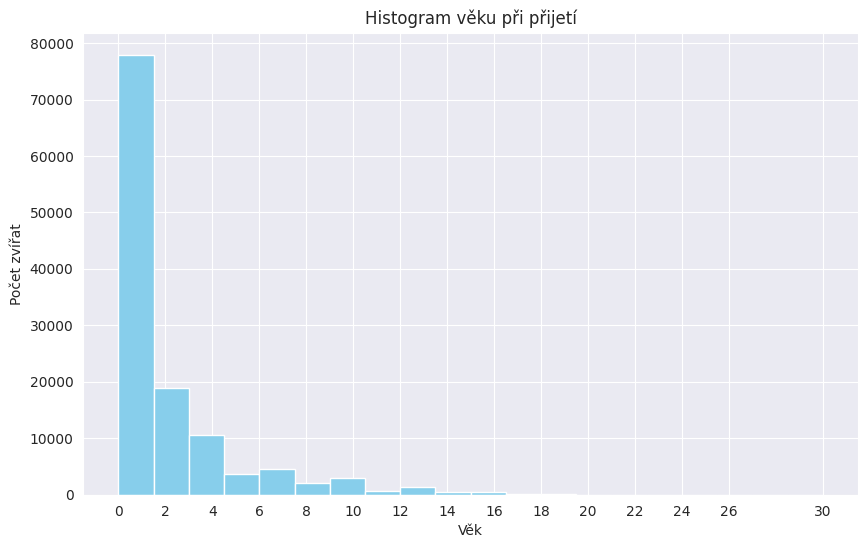

In [54]:
age_stats = pd.DataFrame(np.array([
    ['Minimal age', intakes['Age upon Intake'].min()],
    ['Maximum age', intakes['Age upon Intake'].max()],
    ['Average age', intakes['Age upon Intake'].mean()],
    ['Median', intakes['Age upon Intake'].median()],
    ['Variance', intakes['Age upon Intake'].var()],
]), columns=['Title', 'Value'])
display(age_stats)

# For better representation, Didnt like how pyplot divided it
age_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 30]

plt.figure(figsize=(10, 6))
plt.hist(intakes['Age upon Intake'], bins=20, color='skyblue')
plt.title('Histogram věku při přijetí')
plt.xlabel('Věk')
plt.xticks(age_bins)
plt.ylabel('Počet zvířat')
plt.show()

### Popis příznaku DateTime

In [55]:
# https://practicaldatascience.co.uk/data-science/how-to-find-the-most-common-value-in-a-pandas-column
common_year = intakes['DateTime'].dt.year.value_counts().idxmax()
print(f'Nejběžnější rok: {common_year}')

common_month = intakes['DateTime'].dt.month.value_counts().idxmax()
print(f'Nejběžnější měsíc: {common_month}')

common_day = intakes['DateTime'].dt.day_name().value_counts().idxmax()
print(f'Nejběžnější den v týdnu: {common_day}')

Nejběžnější rok: 2019
Nejběžnější měsíc: 6
Nejběžnější den v týdnu: Monday


Z grafu "Rozložení částí dne" můžeme vyvodit několik základních poznatků:

1. Nejběžnější část dne: Z grafu je patrné, že nejběžnější částí dne pro přijetí zvířat do útulku je odpoledne. To znamená, že většina zvířat je přijímána v odpoledních hodinách.

  2.  Méně časté části dne: Ráno a večer jsou méně časté části dne pro přijímání zvířat do útulku. To naznačuje, že počet zvířat, která jsou přijímána během těchto částí dne, je nižš, možným vysvětlením toho, proč je přijímáno více zvířat odpoledne a večer, může být to, že některá zvířata se schovávají.

    3. Významná distribuce: Celkově máme z grafu jasné povědomí o tom, jak je časové rozložení příjmů zvířat do útulku během dne. To může být užitečné pro plánování pracovních směn a zajištění dostatečné péče o zvířata během různých částí dne.

Z grafu můžeme vyvodit, že části dne mají vliv na příjem zvířat do útulku, což může být užitečné pro plánování personálních zdrojů a organizaci péče o zvířata.

In [56]:
# Create new columns where I divided day into 3 parts, Morning Afternoon Evening-Night
intakes['Part of Day'] = intakes['DateTime'].dt.hour.apply(lambda x: '6:00-12:00' if 6 <= x < 12 else ('12:00-18:00' if 12 <= x < 18 else '18:00-6:00'))
part_of_day_order = ["6:00-12:00", "12:00-18:00", "18:00-6:00"]

# To have data in order
part_of_day_counts = intakes['Part of Day'].value_counts().loc[part_of_day_order]

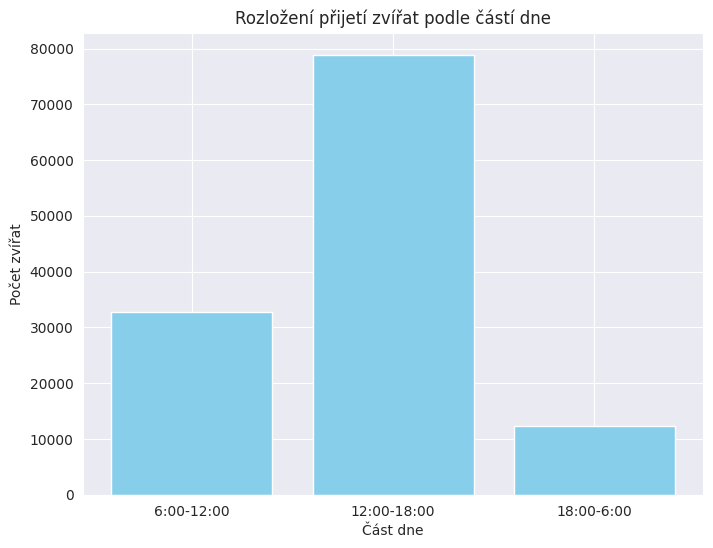

In [57]:
plt.figure(figsize=(8, 6))

plt.bar(part_of_day_counts.index, part_of_day_counts.values, color='skyblue')
plt.title('Rozložení přijetí zvířat podle částí dne')
plt.xlabel('Část dne')
plt.ylabel('Počet zvířat')
plt.show()

### Popis příznaku Animal Type
Z grafu "Počet zvířat podle typu" můžeme vyvodit několik důležitých informací:

   1. Nejběžnější typy zvířat: Z grafu je zřejmé, že nejběžnějším typem zvířat přijatých do útulku jsou psi (Dogs) a kočky (Cats). Tyto dva typy jsou nejběžnější, nejčastěji chovaná domácí zvířata a  mají výrazně vyšší počet než ostatní typy.
   2. Různorodost typů zvířat: Graf ukazuje, že útulek přijímá různé typy zvířat, včetně psů, koček, ptáků a dalších. Tato různorodost zvířat může ovlivnit péči a adopční programy v útulku.
   3. Potenciální potřeba pro různé druhy péče: Vzhledem k různým typům zvířat přijatým do útulku, může být třeba různých druhů péče, včetně stravy, léčby a výběru vhodných adopčních rodin pro různé typy zvířat.
   

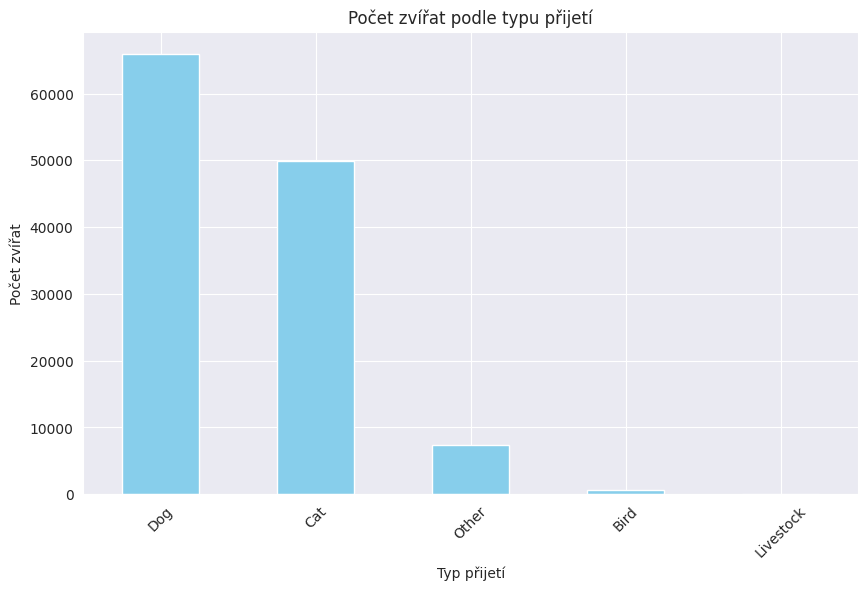

In [58]:
animal_type_counts = intakes['Animal Type'].value_counts()

plt.figure(figsize=(10, 6))
animal_type_counts.plot(kind='bar', color='skyblue')
plt.title('Počet zvířat podle typu přijetí')
plt.xlabel('Typ přijetí')
plt.ylabel('Počet zvířat')
plt.xticks(rotation=45)
plt.show()

### Popis příznaku Intake Type
Toto je kategorický příznak, který popisuje, jakým způsobem bylo zvíře přijato, například "Stray" (zatoulané zvíře) nebo "Owner Surrender" (odevzdání majitelem).
Můžeme zjistit, jaký typ přijetí je nejběžnější a jak se liší výsledky pro různé typy přijetí.

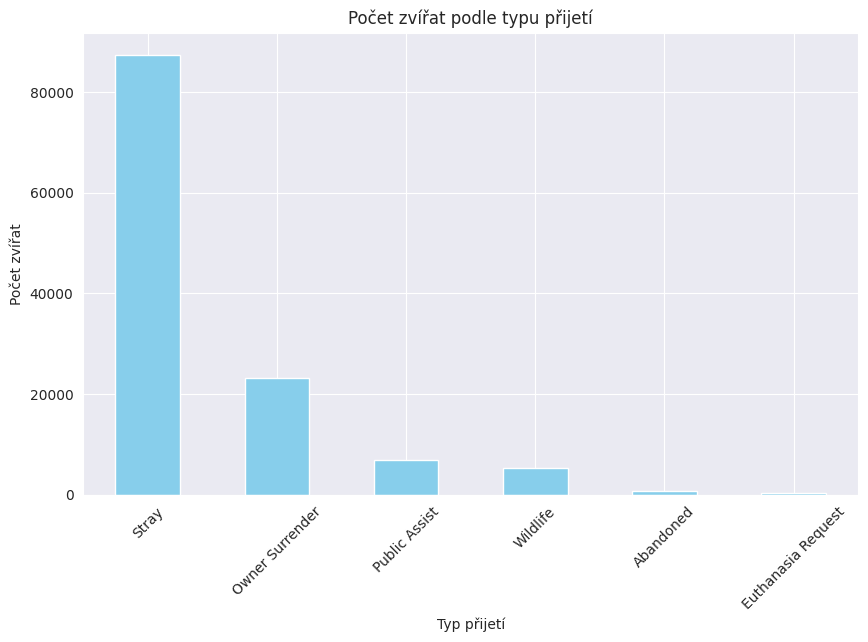

In [59]:
intake_type_counts = intakes['Intake Type'].value_counts()


plt.figure(figsize=(10, 6))
intake_type_counts.plot(kind='bar', color='skyblue')
plt.title('Počet zvířat podle typu přijetí')
plt.xlabel('Typ přijetí')
plt.ylabel('Počet zvířat')
plt.xticks(rotation=45) 
plt.show()

### Popis příznaku Intake Condition
Nejběžnější stav při přijetí: "Normal" s počtem 105,388 zvířat.
Nejméně běžný stav při přijetí: "Panleuk" s jedním zvířetem.

1. Nejběžnějším stavem při přijetí je "Normal," což znamená, že většina zvířat byla přijata do útulku v dobrém zdravotním stavu.

2. I když "Normal" je nejběžnějším stavem, existují také zvířata, která byla přijata s různými zdravotními problémy, jako jsou "Injured" (zraněné), "Sick" (nemocné) a "Nursing" (kojící).

3. Existuje také menší počet zvířat přijatých s různými specifickými stavy, jako jsou "Aged" (staří), "Neonatal" (novorozená), "Pregnant" (těhotné), "Behavior" (problémy se chováním) a další.

,Počet zvířat,Procentuální zastoupení
Intake Condition,,
Normal,105388,85.07%
Injured,7427,5.99%
Sick,5796,4.68%
Nursing,3874,3.13%
Aged,428,0.35%
Neonatal,317,0.26%
Other,230,0.19%
Medical,161,0.13%
Feral,122,<0.1%


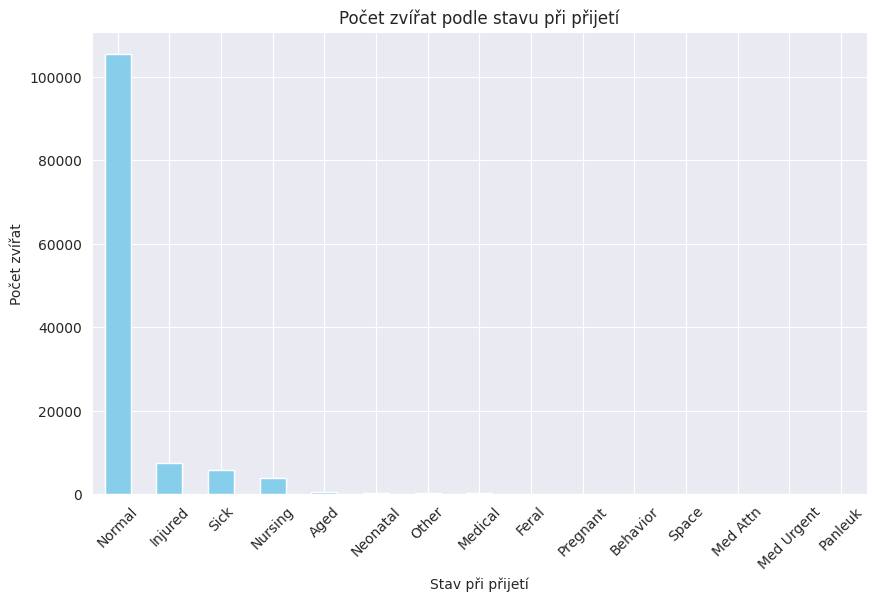

In [60]:
intake_condition_counts = intakes['Intake Condition'].value_counts()
total_animals = len(intakes) 

# Get percentage for conditions
percentages = (intake_condition_counts / total_animals) * 100
# <0.1% otherwise number is so small it becomes 0
percentage_description = percentages.apply(lambda x: f'<0.1%' if x < 0.1 else f'{x:.2f}%')

# Create new DF
condition_percentage_df = pd.DataFrame({
    #'Stav při přijetí': intake_condition_counts.index,
    'Počet zvířat': intake_condition_counts.values,
    'Procentuální zastoupení': percentage_description
})

display(condition_percentage_df)

plt.figure(figsize=(10, 6))
intake_condition_counts.plot(kind='bar', color='skyblue')
plt.title('Počet zvířat podle stavu při přijetí')
plt.xlabel('Stav při přijetí')
plt.ylabel('Počet zvířat')
plt.xticks(rotation=45)

plt.show()

### Analýza vztahu mezi Animal Type (Typ zvířete) a Outcome Type (Typ výstupu).

Tato analýza vám poskytuje přehled o osudech různých typů zvířat přijatých do útulku a pomáhá organizaci lepších porozumět, jaký typ péče a podpory potřebují různá zvířata.

In [61]:
import seaborn as sns

# https://www.statology.org/contingency-table-python/
contingency_table = pd.crosstab(intakes["Animal Type"], outcomes["Outcome Type"])

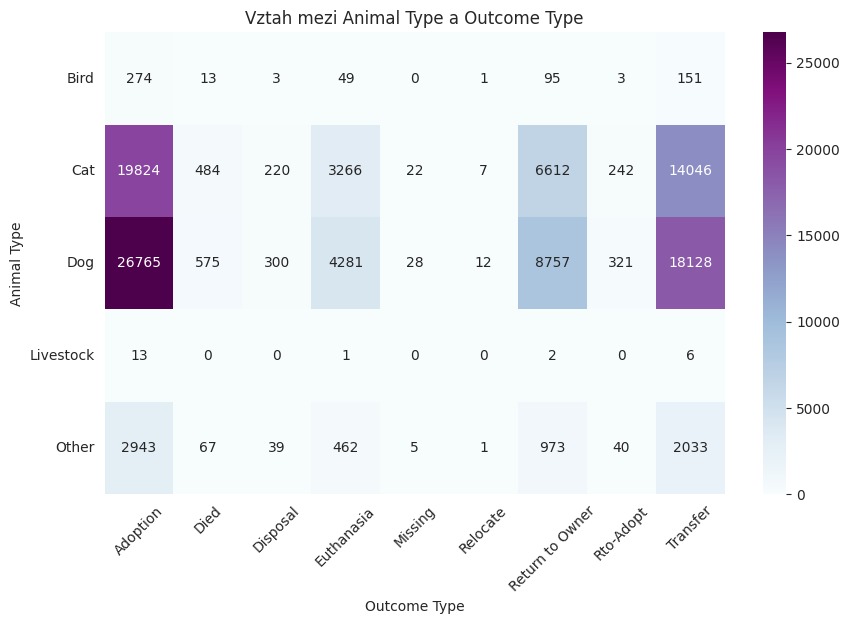

In [62]:
plt.figure(figsize=(10, 6))
# https://notebook.community/chris1610/pbpython/notebooks/Crosstab_Explained
sns.heatmap(contingency_table, annot=True, cmap="BuPu", fmt="g")

plt.title("Vztah mezi Animal Type a Outcome Type")
plt.xlabel("Outcome Type")
plt.ylabel("Animal Type")
plt.xticks(rotation=45) # easier to read
plt.yticks(rotation=0) # easier to read
plt.show()

### Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

Srovnání počtu zvířat podle typu příchodu a odchodu: Graf nám ukazuje, kolik zvířat vstoupilo do útulku pro různé typy příchodu (Intake Type) a kolik z útulku odešlo pro různé typy odchodu (Outcome Type). Můžeme porovnat, jak se tyto hodnoty liší mezi různými typy zvířat.

Z grafu můžeme pozorovat, zda existuje nějaká zjevná závislost mezi typem příchodu a odchodu. Například, u některých typů zvířat může být více pravděpodobné, že přijdou a odejdou s určitými typy příchodu a odchodu. Např. pro psy je nejběžnější Intake Type=Stray a Outcome Type=Adoption, když pro ostatní zvířata nejběžnější Intake Type=Wildlife a Outcome Type=Euthanasia. Důvody můžou být následující: nemoc, zranění, právní omezení atd. 


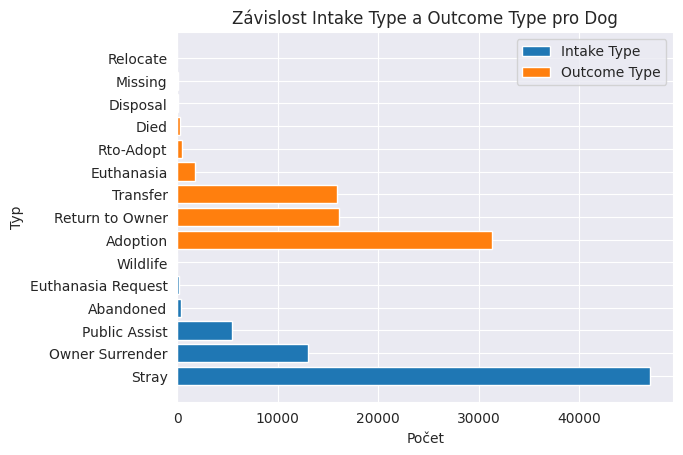

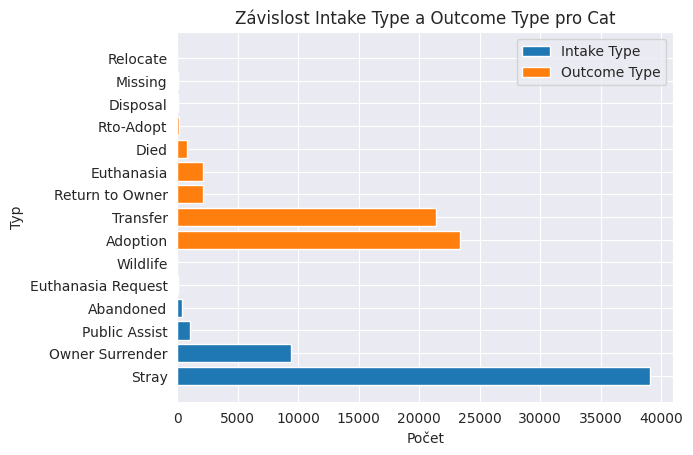

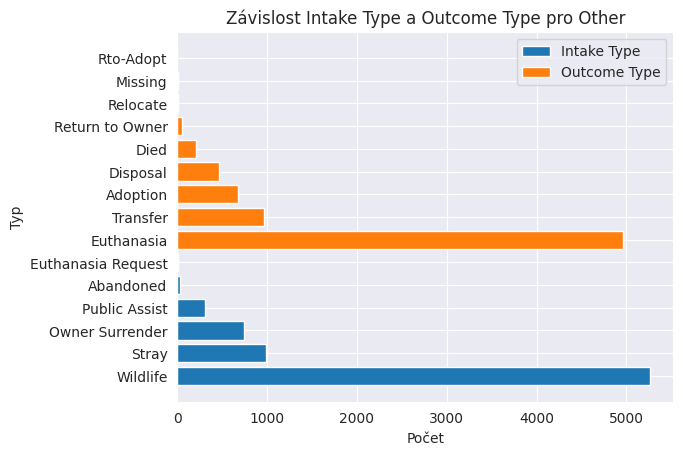

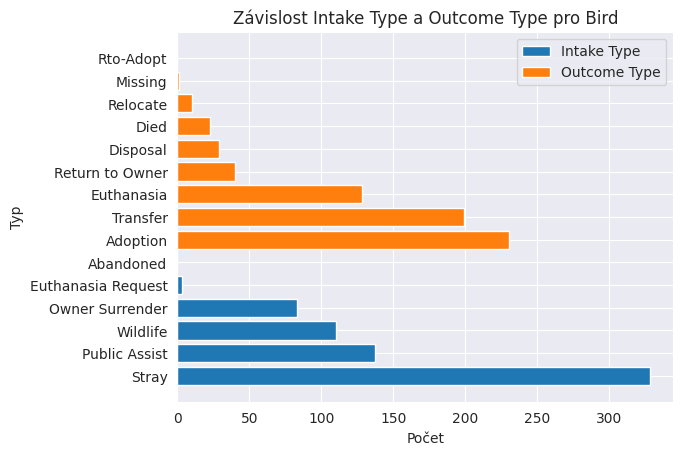

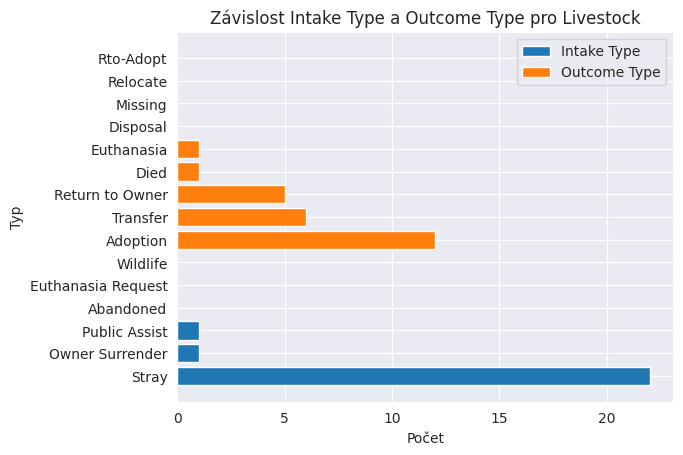

In [63]:
# Get animal types
animal_types = intakes['Animal Type'].unique()

outcome_type_by_animal_type = {}

# Get data for each type
for animal_type in animal_types:
    outcome_type_values = outcomes[outcomes['Animal Type'] == animal_type]['Outcome Type'].unique()
    outcome_type_by_animal_type[animal_type] = outcome_type_values

# Create graph for each animal type and outcome types
# First I wanted to create all info in one graph, but it was to much information and was chaotic
# I didnt know how to fix, how to get right info and display it on multiple graphs, Chat GPT helped  
for animal_type, outcome_types in outcome_type_by_animal_type.items():
    plt.figure()
    # Needed barh otherwise text overlapped, dunno how to fix
    # Get categories and values for each category
    plt.barh(intakes[intakes['Animal Type'] == animal_type]['Intake Type'].value_counts().index,
            intakes[intakes['Animal Type'] == animal_type]['Intake Type'].value_counts(), label='Intake Type')
    # Get categories and value for each category
    plt.barh(outcomes[outcomes['Animal Type'] == animal_type]['Outcome Type'].value_counts().index,
            outcomes[outcomes['Animal Type'] == animal_type]['Outcome Type'].value_counts(), label='Outcome Type')
    plt.title(f'Závislost Intake Type a Outcome Type pro {animal_type}')
    plt.xlabel('Počet')
    plt.ylabel('Typ')
    plt.legend()

plt.show()

### Hraje věk zvířete roli při adopci?
Ano, hraje velkou roli. Můžeme vidět, že se zvětšujícím věkem počet adopci klesá.

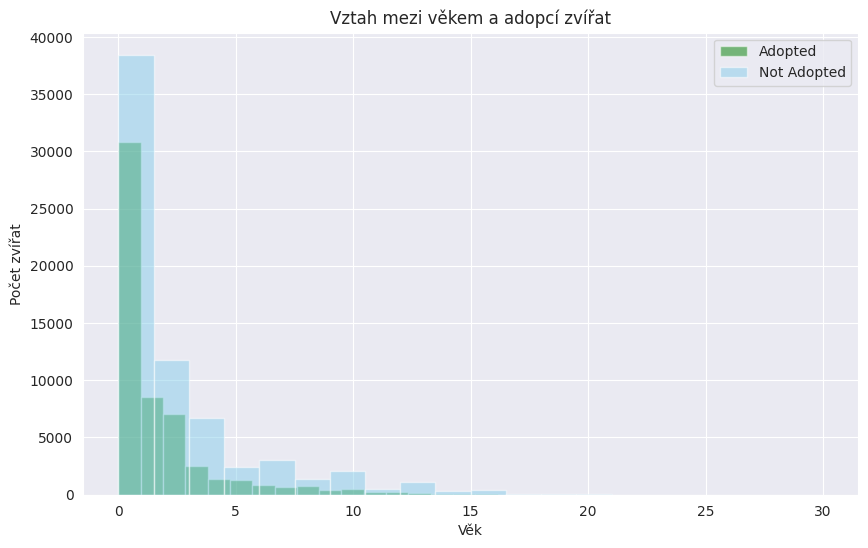

In [64]:
plt.figure(figsize=(10, 6))

# Divide by adopted and not adopted
adopted = outcomes[outcomes['Outcome Type'] == 'Adoption']
not_adopted = outcomes[outcomes['Outcome Type'] != 'Adoption']

# Create two graphs for adopted and not adopted
plt.hist(adopted['Age upon Outcome'], bins=20, alpha=0.5, label='Adopted', color='green')
plt.hist(not_adopted['Age upon Outcome'], bins=20, alpha=0.5, label='Not Adopted', color='skyblue')

plt.xlabel('Věk')
plt.ylabel('Počet zvířat')
plt.title('Vztah mezi věkem a adopcí zvířat')
plt.legend()

plt.show()

### Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?
Můžeme vidět z grafu, že v létě květnu a červnu je zátěž větší a že s porovnáním s prosincem zátěž klesne skoro o 30 %. Obecně z grafu je vidět, že největší zátěž je na konci jara a záčatek léta, nejnižší v zimě.

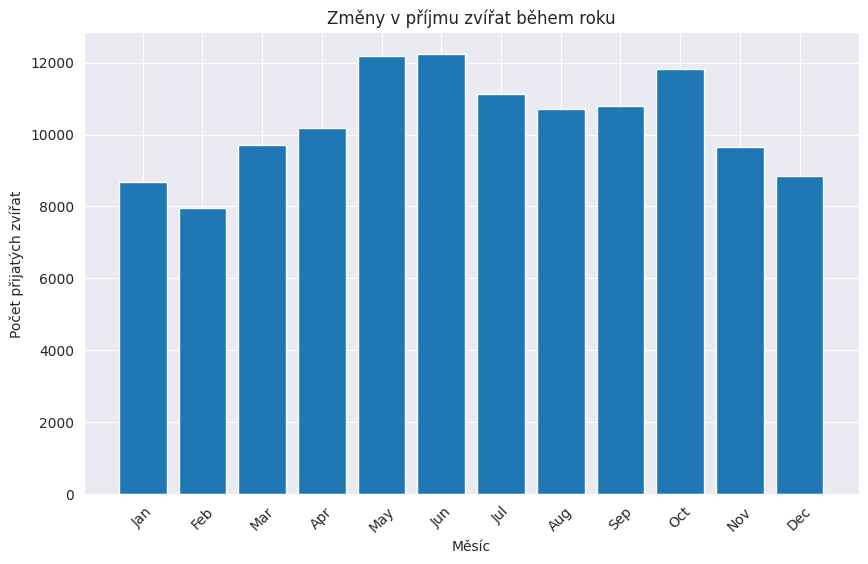

In [65]:
# Extract month from DateTime
intakes['Month'] = intakes['DateTime'].dt.month

# Group by month
monthly_counts = intakes['Month'].value_counts().sort_index()

# For x axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_counts)
plt.xlabel('Měsíc')
plt.ylabel('Počet přijatých zvířat')
plt.title('Změny v příjmu zvířat během roku')
plt.xticks(rotation=45)

plt.show()

**❓ Vlastní otázky**
* Jaká je průměrná délka pobytu zvířat v útulku v závislosti na jejich typu?
* Jaký je poměr pohlaví zvířat při přijetí?
* Jaký je poměr pohlaví zvířat při odchodu?

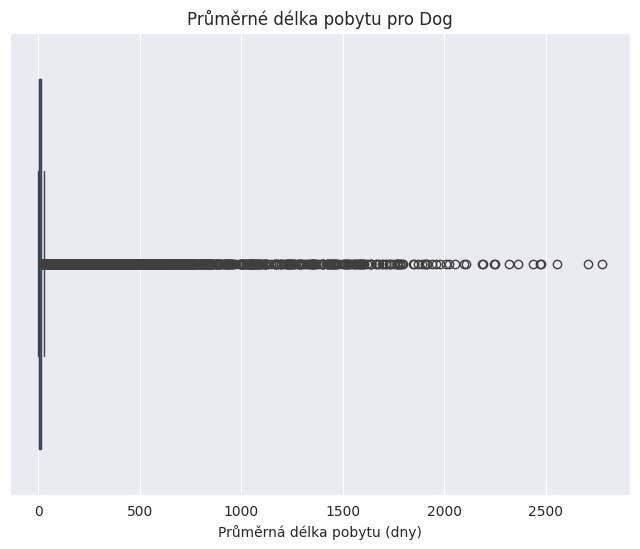

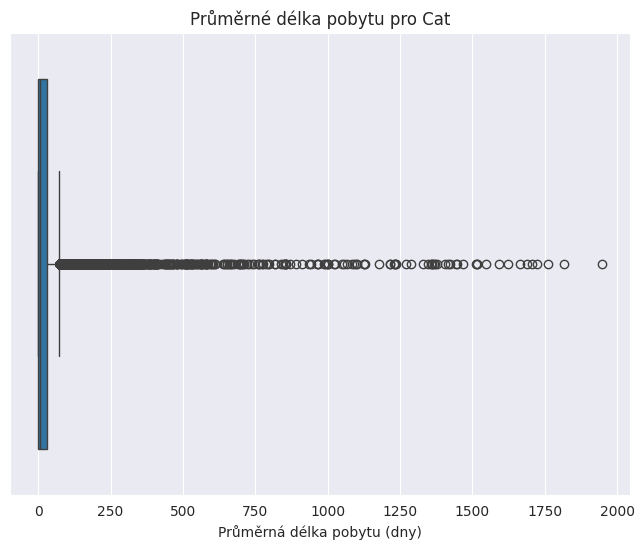

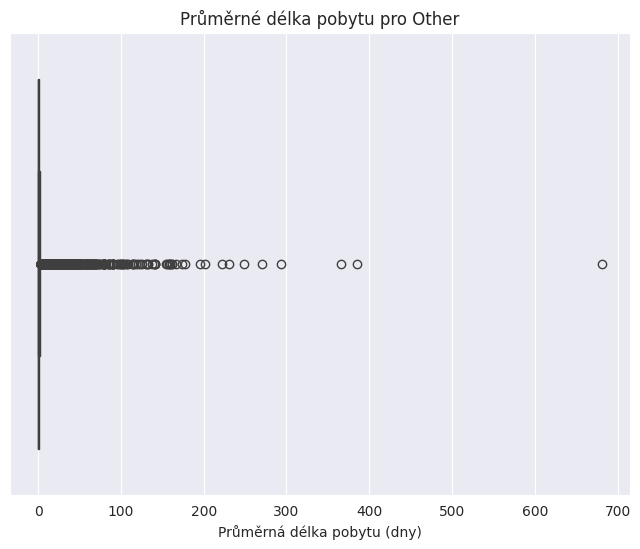

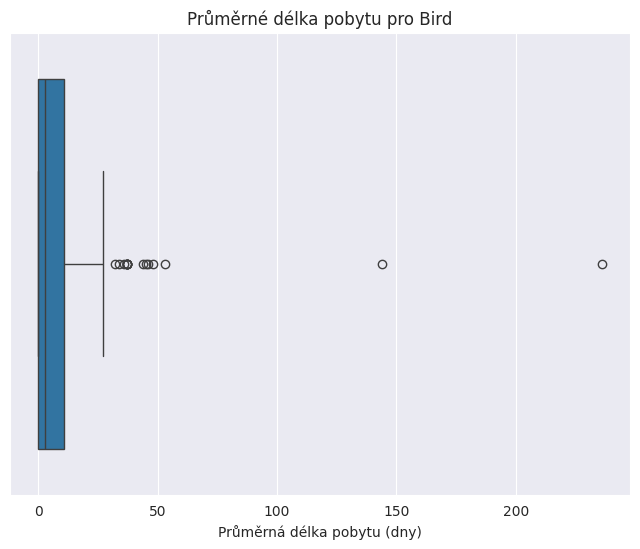

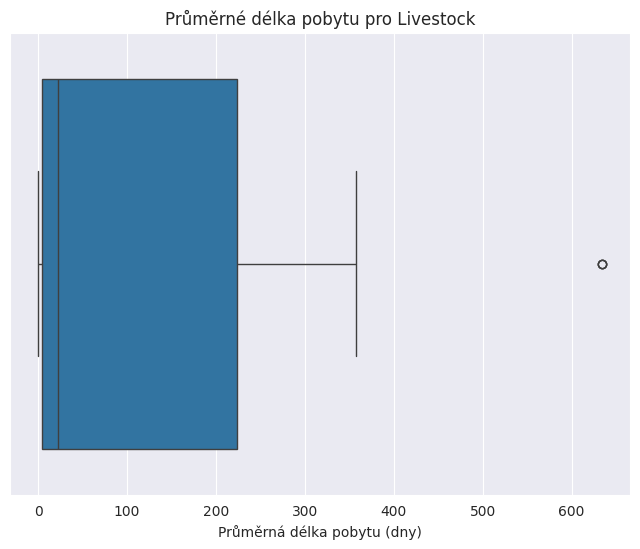

In [66]:
merged_data = pd.merge(intakes, outcomes, on='Animal ID', suffixes=('_intake', '_outcome'))
# Need data where outcome is bigger in intake date, to avoid negative numbers
merged_data = merged_data[merged_data['DateTime_outcome'] > merged_data['DateTime_intake']]

merged_data['DateTime_intake'] = pd.to_datetime(merged_data['DateTime_intake'])
merged_data['DateTime_outcome'] = pd.to_datetime(merged_data['DateTime_outcome'])
merged_data['Length_of_Stay'] = (merged_data['DateTime_outcome'] - merged_data['DateTime_intake']).dt.days

# Count for each animal type
animal_types = merged_data['Animal Type_intake'].unique()
for animal_type in animal_types:
    # Choose for each type and save data
    data_for_type = merged_data[merged_data['Animal Type_intake'] == animal_type]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Length_of_Stay', data=data_for_type)
    plt.title(f'Průměrné délka pobytu pro {animal_type}')
    plt.xlabel('Průměrná délka pobytu (dny)')

plt.show()

Jaká je poměr pohlaví zvířat při přijetí?

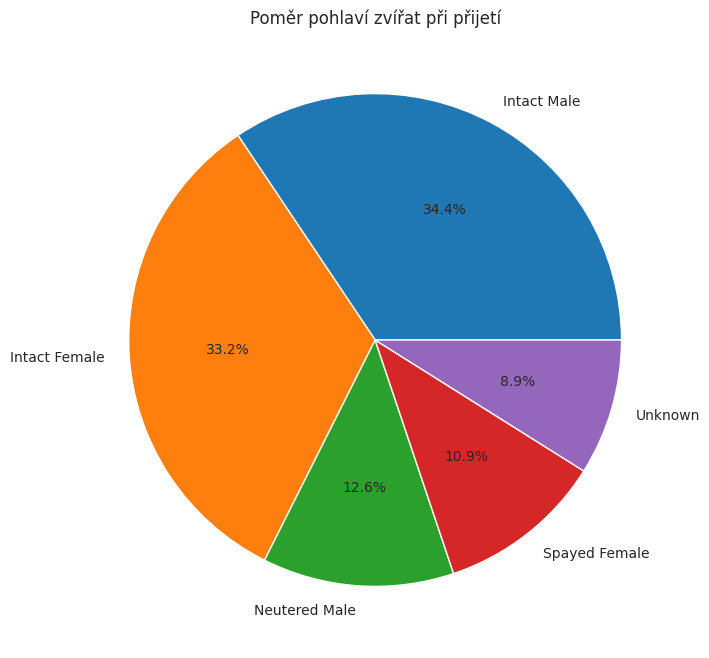

In [67]:
sex_counts_intake = intakes['Sex upon Intake'].value_counts()

plt.figure(figsize=(8, 8))
sex_counts_intake.plot(kind='pie', autopct='%1.1f%%')
plt.title('Poměr pohlaví zvířat při přijetí')
plt.ylabel('')
plt.show()

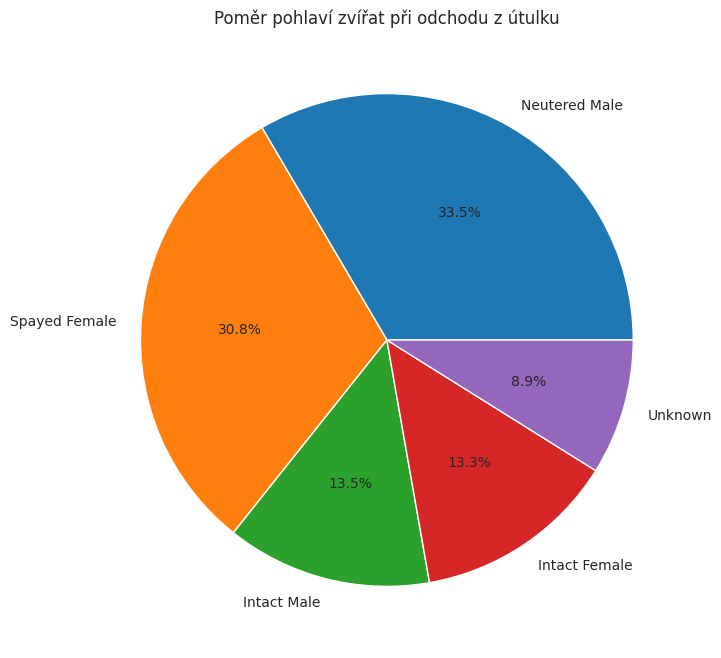

In [68]:
sex_counts_outcome = outcomes['Sex upon Outcome'].value_counts()

plt.figure(figsize=(8, 8))
sex_counts_outcome.plot(kind='pie', autopct='%1.1f%%')
plt.title('Poměr pohlaví zvířat při odchodu z útulku')
plt.ylabel('')
plt.show()